Avtor: ** Nejc Karlo, 23160175 ** <br><br>
Datum: 20. 12. 2017 <br><br>
Potrjujem, da sem avtor projektne naloge in da sem vso vsebino pripravil sam. V primeru, da se ugotovi plagiatorstvo, se zavedam da ne bom izpolnjeval pogojev za pristop k izpitu
* * *

# Uvod
Namen projektne naloge je pokazati znanje pridobljeno pri predmetu numerične metode na praktičnem primeru, ki se navezuje na katerikoli predmet na Fakulteti za strojništvo. Jaz sem si za primer na katerem bom pokazal osvojeno znanje izbral klasičen problem inženirjev, to je nosilec oz. sistem nosilca in dveh palic. Sistem je prikazan na spodnji sliki (Slika 1). Podatke za nalogo sem dobil iz strojniškega priročnika, ostale kot so geometrija in velikost sil pa sem si izmislil.  Nalogo sem razdelil na zahtevane vsebinske sklope,  vsi se navezujejo na podan sistem oz. nosilec. <br>
<img width=900px src="Slika_sistem.png" alt="Slika 1">
<center>Slika 1</center>
* * *

# Iskanje ničel
## Definicija naloge
Določite razdaljo $x_0$ od podpore N, kjer še lahko prijemlje sila F, tako da bo največja upogibna napetost v prvem polju nosilca še v mejah dopustne napetosti. Vpliv notranjih strižnih sil zanemarite (zanemarljiv vpliv v primerjavi z momentom). Za nadaljne preračune vzemite razdaljo, ki je bližje podpori N.

Podatki: 

$ F = 9 \space kN $ 

$ L = 4 \space m  $ 

$ R_{p0.2} = 400 \space MPa $ 

$ n = 3 $

$ I_z = 282*10^4 \space mm^4  $ 

$ q = 2 \space \frac{kN}{m} $  


Dani sistem sestavljen iz nosilca in dveh palic razrežemo v členku in tako dobimo nov sistem sestavljen le iz nosilca, prikazanega na spodnji sliki (Slika 2).

<img width=900px src="Slika_iskanje_ničel.png" alt="Slika 2">
<center>Slika 2</center>

Ker bom prijemališče določal le glede na maksimalni moment v prvem polju (in ker kot vidimo v nadaljevanju se izkaže, da moment doseže maksimum v drugem polju) bom napetost tečenja materiala delil z visokm varnostnim faktorjem $n = 3$ in tako poskrbel, da sem na varni strani.

Najprej je potrebno določiti reakcije v podporah.

Zapišemo enačbe (1. Newtonov zakon):
$$ \sum F_x = 0: N_x = 0 $$

$$ \sum F_y = 0: N_y = F - B_y + q*L $$

$$ \sum M_N = 0: -F*x_0 + B_y*L - q*\frac{L}{2} = 0 $$

Iz zapisanih enačb lahko določimo reakcijski sili:
$$ B_y = \frac{F*x_0}{L} + \frac{q*L}{2} $$

$$ N_y = F - B_y + q*L $$

Za določitev maksimalnega notranjega momenta moramo nosilec razrezati kot je prikazano na sliki 2:

$$ M_{max} = N_y*x_0 -q*\frac{x_0^2}{2} $$

Nazadnje vstavimo v enačbo za čisti upogib (strižne sile smo zanemarili):

$$ \frac{M_{max}}{I_z}*y_{max} \leq \sigma_{dop} $$

Dobimo kvadratno enačbo:

$$ (\frac{F}{L}+\frac{q}{2})*x_0^2 - (F-\frac{q*L}{2}+q*L)*x_0 + \frac{\sigma_{dop}*I_z}{y_{max}} = 0 $$

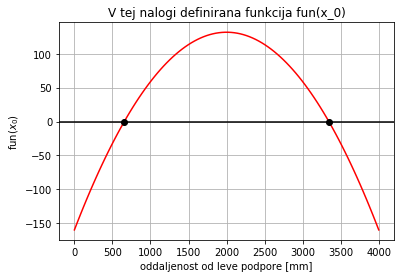

Bisekcijska metoda izračuna ničli funkcije pri 655.83mm in 3344.17 mm.
Pri nadaljnih preračunih bomo upoštevali razdaljo bližje levi podpori, ki znaša 655.83 mm.

Na grafu vidimo, da se izračunane ničle ujemajo s prej izrisano funkcijo.



In [14]:
#podatki
F = 9000 #N
L = 4000 #mm
R_m = 480 #MPa
n = 3 #varnostni faktor
sigma_dop = R_m/n #MPa
I_z = 282*10**4 #mm^4
y_max = 63.3 #mm
q = 2 #N/mm
alfa = 45 #°
beta = 30 #°

#definiramo funkcijo
def fun(x_0, L = L, F = F, q = q, sigma_dop = sigma_dop, I_z = I_z, y_max = y_max):
    """
    Funkcija, ki vrne vrednost, ki predstavlja ustreznost oddaljenosti točkovne sile F od leve podpore. Če je vrnjena vrednost
    funkcije manjša ali enaka nič, je sila F ustrezno oddaljena od leve podpore, če je vrednost, ki jo vrne funkcija večja od
    nič, sila ni ustrezno oddaljena od leve podpore (funkcija velja za podan sistem in podano obremenitveno stanje, ter je
    definirana glede na koordinatni sistem prikazan na Sliki 2).
    
    parameter x_0: oddaljenost prijemališča sile F od leve podpore (N)
    parameter L: dolžina nosilca
    parameter F: velikost točkovne sile
    parameter q: velikost konstante kontinuirne sile 
    parameter sigma_dop: maksimalna napetost v materialu nosilca
    parameter I_z: vztrajnostni moment prereza
    parameter y_max: največja oddaljenost skrajne točke prereza od težiščne osi (v y smeri)
    """
    B_y = F*x_0/L + q*L/2
    N_y = F - B_y + q*L
    M_max = N_y*x_0 - q*x_0**2/2
    
    return (M_max/I_z)*y_max - sigma_dop

#za boljšo predstavo in določitev približkov za uporabo bisekcijske metode izrišemo definirano funkcijo

#uvozimo modul numpy
import numpy as np

#definiramo numerično polje, ki predstavlja oddaljenost od leve podpore
x_0_num = np.linspace(0, L, 100)

#uvozimo modul matplotlib
import matplotlib.pyplot as plt

#skonstruiramo graf
plt.plot(x_0_num, fun(x_0_num), 'r')
#poimenujemo graf
plt.title('V tej nalogi definirana funkcija fun(x_0)')
#dodamo x os
plt.axhline(color='k')
#poimenujemo x os
plt.xlabel('oddaljenost od leve podpore [mm]')
#poimenujemo y os
plt.ylabel('fun($x_0$)')
#dodamo mrežo
plt.grid()

#uvozimo bisekcijsko metodo za določanje ničel
from scipy.optimize import bisect

#izračun ničel s pomočjo bisekcijske metode
x_1_b = bisect(fun, 500, 1000) #prijemališče bližje podpori N
x_2_b = bisect(fun, 3000, 4000) #prijemališče bližje podpori B

#dodamo izračunani ničli na graf
plt.plot(x_1_b, 0, 'ko')
plt.plot(x_2_b, 0, 'ko')
#izrišemo graf
plt.show()

#izpišemo rezultat
x_0r = min(x_1_b, x_2_b) #za nadaljno uporabo
print(f'Bisekcijska metoda izračuna ničli funkcije pri {x_1_b:.2f}mm in {x_2_b:.2f} mm.\nPri nadaljnih preračunih bomo upoštevali razdaljo bližje levi podpori, ki znaša {x_1_b:.2f} mm.\n\nNa grafu vidimo, da se izračunane ničle ujemajo s prej izrisano funkcijo.\n')

* * *
# Sistemi linearnih enačb, simbolno računanje

## Definicija naloge
Z upoštevanjem prijemališča sile izračunanega v prejšni nalogi, določite sile v obeh palicah in podpori B, ter narišite NTM diagrame.

Sistem prikazan na prvi sliki preoblikujemo v fizikalni model prikazan na spodnji sliki (Slika 3).

<img width=900px src="Slika_sistem_linearnih_enačb.png" alt="Slika 3"> 
<center>Slika 3</center>

Nastavimo ravnotežje za dani sistem (1. Newtonov zakon):

$$ \sum F_x = 0: N_1*sin45° - N_2*sin30° = 0 $$

$$ \sum F_y = 0: N_1*cos45° + N_2*cos30° + B_y - F - q*L = 0 $$

$$ \sum M_B = 0: -N_1*cos45°*L - N_2*cos30°*L + F*(L-x_0) + q*L*\frac{L}{2} = 0 $$

Dobimo sistem treh enačb s tremi neznankami in jih zapišemo v matrično obliko.

In [15]:
#definiramo matriko koeficientov
matrika_koeficientov = np.array([[np.sin(np.radians(alfa)), -np.sin(np.radians(beta)), 0],
                                [np.cos(np.radians(alfa)), np.cos(np.radians(beta)), 1],
                                [-np.cos(np.radians(alfa))*L, -np.cos(np.radians(beta))*L, 0]],)

#preverimo pogojenost matrike
pogojenost = np.linalg.cond(matrika_koeficientov)
print(f'Pogojenost matrike = {pogojenost:.2f} \n')

#preverimo determinanto matrike
determinanta = np.linalg.det(matrika_koeficientov)
print(f'Determinanta matrike = {determinanta:.2f} \n')

#definiramo matriko konstant
matrika_konstant = np.array([[0], [F+q*L], [-F*(L-x_0r)-q*(L**2)/2]])

#rešimo sistem
neznane_sile = np.linalg.solve(matrika_koeficientov, matrika_konstant)

#zapišemo rezultate kot float za izpis v naslednjem koraku
N_1 = float(neznane_sile[0])
N_2 = float(neznane_sile[1])
B_y = float(neznane_sile[2])

#izpišemo rezultat
print(f'Reakcijske sile so:\nN1 = {N_1} N \nN2 = {N_2} N \nBy = {B_y} N')

Pogojenost matrike = 5176.38 

Determinanta matrike = 3863.70 

Reakcijske sile so:
N1 = 5965.454109362697 N 
N2 = 8436.426107175046 N 
By = 5475.627620448629 N


Za primerjavo bom reakcije izračunal še s simbolnim računanjem.

In [16]:
#uvozimo modul sympy
import sympy as sym

#za lepšo Latex sintakso
sym.init_printing()

#definiramo spremenljivke
N1, N2, By, F, L, q, x_0, alpha, beta = sym.symbols('N1, N2, By, F, L, q, x_0, alpha, beta')

#definiramo enačbe za sile v podporah
reakcija_x = N1*sym.sin(sym.pi/180*alpha) - N2*sym.sin(sym.pi/180*beta)
enačba_x = sym.Eq(reakcija_x, 0)
reakcija_y = N1*sym.cos(sym.pi/180*alpha) + N2*sym.cos(sym.pi/180*beta) - F - q*L + By
enačba_y = sym.Eq(reakcija_y, 0)
reakcija_M = -N1*sym.cos(sym.pi/180*alpha)*L - N2*sym.cos(sym.pi/180*beta)*L + F*(L-x_0) + q*L**2/2
enačba_M = sym.Eq(reakcija_M, 0)
enačbe_reakcij = enačba_x, enačba_y, enačba_M

#vstavimo znane podatke
enačba_x_izračun = enačba_x.subs([(alpha, 45), (beta, 30)])
enačba_y_izračun = enačba_y.subs([(F, 9000), (q, 2), (L, 4000), (alpha, 45), (beta, 30)])
enačba_M_izračun = enačba_M.subs([(F, 9000), (q, 2), (L, 4000), (x_0, x_0r), (alpha, 45), (beta, 30)])
vstavljene_enačbe_reakcij = enačba_x_izračun, enačba_y_izračun, enačba_M_izračun

#izračunamo reakcije
izrazi = [enačba_x_izračun, enačba_y_izračun, enačba_M_izračun]
rešitev_reakcije = sym.solve(izrazi)

#izpišemo enačbe in rezultat
print(f'Enačbe reakcij so:')
display(enačbe_reakcij)
print(f'Ko vstavimo podatke dobimo:')
display(vstavljene_enačbe_reakcij)
print(f'Ko rešimo sistem linearnih enačb dobimo:')
display(rešitev_reakcije)

#komentar
print(f'\nVidimo, da dobimo enak rezultat, simbolo računanje je natančnejše, a kot vidimo v spodnjih dveh celicah\ntudi precej bolj zahtevno in zato počasnejše.')

Enačbe reakcij so:


Ko vstavimo podatke dobimo:


Ko rešimo sistem linearnih enačb dobimo:



Vidimo, da dobimo enak rezultat, simbolo računanje je natančnejše, a kot vidimo v spodnjih dveh celicah
tudi precej bolj zahtevno in zato počasnejše.


In [17]:
%%timeit
rešitev_reakcije = sym.solve(izrazi)

87 ms ± 930 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
%%timeit
neznane_sile = np.linalg.solve(matrika_koeficientov, matrika_konstant)

13.3 µs ± 354 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


Sedaj bom simbolno zapisal še enačbe notranjih sil in momenta, ki jih dobimo z rezanjem nosilca na dve polji. Nato pa bom simbolno zapisane izraze z uporabo funkcije lambdify modula sympy prevedel v funkcije, optimirane za numerično izvajanje in nato izrisal NTM diagrame.<br>
Enačbe prvega polja:

$$ N(x) = N_2*sin30° - N_1*sin45° $$

$$ T(x) = N_1*cos45° + N_2*cos30° - q*x $$

$$ M(x) = N_1*cos45°*x + N_2*cos30°*x - q*\frac{x^2}{2} $$

Enačbe drugega polja:

$$ N(x) = N_2*sin30° - N_1*sin45° $$

$$ T(x) = N_1*cos45° + N_2*cos30° - q*x - F $$

$$ M(x) = N_1*cos45°*x + N_2*cos30°*x - q*\frac{x^2}{2} - F*(x-x_0) $$

In [19]:
#definiramo spremenljivke
N1, T1, M1, N2, T2, M2, q, x, By, beta, alpha, x_0, F = sym.symbols('N1, T1, M1, N2, T2, T3, q, x, By, beta, alpha, x_0, F')

#definiramo izraze za notranji sili in moment v prvem polju
osna_sila_1 = N2*sym.sin(sym.pi/180*beta) - N1*sym.sin(sym.pi/180*alpha)
strižna_sila_1 = N1*sym.cos(sym.pi/180*alpha) + N2*sym.cos(sym.pi/180*beta) - q*x
moment_1 = N1*sym.cos(sym.pi/180*alpha)*x + N2*sym.cos(sym.pi/180*beta)*x - q*(x**2)/2

#definiramo izraze za notranji sili in moment v drugem polju
osna_sila_2 = osna_sila_1
strižna_sila_2 = N1*sym.cos(sym.pi/180*alpha) + N2*sym.cos(sym.pi/180*beta) - q*x - F
moment_2 = N1*sym.cos(sym.pi/180*alpha)*x + N2*sym.cos(sym.pi/180*beta)*x - q*((x)**2)/2 - F*(x-x_0)

#vstavimo znane podatke in simbolni izraz pretvorimo v funkcijo, optimirano za numerično izvajanje
osna_sila_1_graf = sym.lambdify(x, osna_sila_1.subs([(N2, N_2), (beta, 30), (alpha, 45), (N1, N_1)]), 'numpy')
osna_sila_2_graf = sym.lambdify(x, osna_sila_2.subs([(N2, N_2), (beta, 30), (alpha, 45), (N1, N_1)]), 'numpy')
strižna_sila_1_graf = sym.lambdify(x, strižna_sila_1.subs([(N1, N_1), (alpha, 45), (beta, 30), (N2, N_2), (q, 2)]), 'numpy')
strižna_sila_2_graf = sym.lambdify(x, strižna_sila_2.subs([(N1, N_1), (alpha, 45), (beta, 30), (N2, N_2), (q, 2), (F, 9000), (x_0, x_0r)]), 'numpy')
moment_1_graf = sym.lambdify(x, moment_1.subs([(N1, N_1), (N2, N_2), (q, 2), (alpha, 45), (beta, 30)]), 'numpy')
moment_2_graf = sym.lambdify(x, moment_2.subs([(N1, N_1), (N2, N_2), (alpha, 45), (beta, 30), (x_0, x_0r), (q, 2), (F, 9000)]), 'numpy')

#komentar
print(f'Vidimo, da je to precej dolgotrajen postopek.')

Vidimo, da je to precej dolgotrajen postopek.


Izris diagrama notranje osne sile v nosilcu.

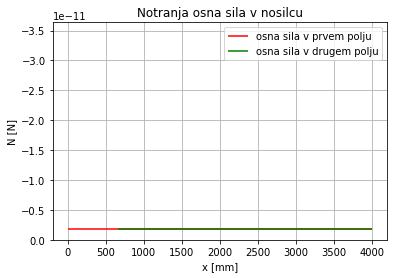

Vidimo, da je osna sila v nosilcu enaka 0, toda zaradi zaokroževanja pride do manjše napake, velikosti -1.81899e-12 N.


In [20]:
#določimo numerično polje x, ki bo uporabljeno za vse NTM diagrame
x_num1 = np.linspace(0, x_0r, 100)
x_num2 = np.linspace(x_0r, 4000, 100)

#določimo numerično polje osne sile
y_N1 = osna_sila_1_graf(x_num1)
y_N2 = osna_sila_2_graf(x_num2)

#izrišemo graf notranje osne sile v nosilcu
#skonstruiramo graf
plt.hlines(y_N1, 0, 4000, 'r', label='osna sila v prvem polju')
plt.hlines(y_N2, x_0r, 4000, 'g', label='osna sila v drugem polju')
#poimenujemo graf
plt.title('Notranja osna sila v nosilcu')
#poimenujemo x os
plt.xlabel('x [mm]')
#poimenujemo y os
plt.ylabel('N [N]')
#podamo velikost skale na y osi
plt.ylim(0,y_N1*20)
#dodamo vidno mrežo
plt.grid()
#dodamo legendo
plt.legend()
#izrišemo graf
plt.show() 

#komentar
print(f'Vidimo, da je osna sila v nosilcu enaka 0, toda zaradi zaokroževanja pride do manjše napake, velikosti {y_N1:.5e} N.')

Izris diagrama strižne notranje sile v nosilcu.

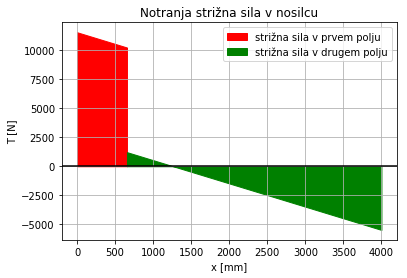

In [21]:
#določimo numerično polje strižne sile
y_T1 = strižna_sila_1_graf(x_num1)
y_T2 = strižna_sila_2_graf(x_num2)

#izrišemo graf notranje strižne sile v nosilcu
#skonstruiramo graf
plt.fill_between(x_num1, y_T1, color='r', label='strižna sila v prvem polju')
plt.fill_between(x_num2, y_T2, color='g', label='strižna sila v drugem polju')
#poimenujemo graf
plt.title('Notranja strižna sila v nosilcu')
#poimenujemo x os
plt.xlabel('x [mm]')
#poimenujemo y os
plt.ylabel('T [N]')
#dodamo x os
plt.axhline(color='k')
#dodamo vidno mrežo
plt.grid()
#dodamo legendo
plt.legend()
#izrišemo graf
plt.show()

Izris diagrama notranjega momenta v nosilcu.

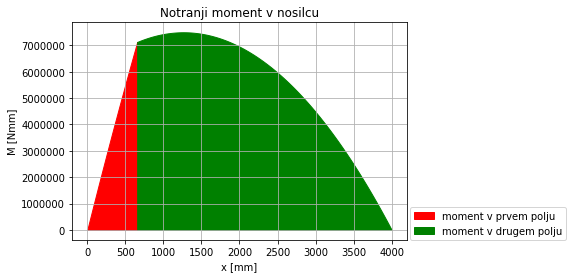

In [22]:
#določimo numerično polje notranjega momenta
y_M1 = moment_1_graf(x_num1)
y_M2 = moment_2_graf(x_num2)

#izrišemo graf notranjega momenta v nosilcu
#skonstruiramo graf
plt.fill_between(x_num1, y_M1, color='r', label='moment v prvem polju')
plt.fill_between(x_num2, y_M2, color='g', label='moment v drugem polju')
#poimenujemo graf
plt.title('Notranji moment v nosilcu')
#poimenujemo x os
plt.xlabel('x [mm]')
#poimenujemo y os
plt.ylabel('M [Nmm]')
#dodamo vidno mrežo
plt.grid()
#dodamo legendo
plt.legend(loc = (1.01, 0))
#izrišemo graf
plt.show()

* * * 
# Interpolacija

## Definicija naloge
Izračunaj strižno napetost v kritičnih točkah prereza iz dveh standardnih oblik L50x100x10, kot je prikazano na spodnji sliki (Slika 4). Nato določi interpolacijsko krivuljo in jo tudi izriši.

<img width=900px src="Slika_strižna_napetost.png" alt="Slika 4">
<center>Slika 4</center>

Pri T obliki prereza pride do poskoka strižne napetosti na prehodu med pasnico in stojino, zato bom izračunal strižno napetost v treh točkah na pasnici in treh točkah na stojini, nato bom določil dve interpolacijski krivulji, ter jih nazadnje izrisal v isti graf.

Strižno napetost v točki izračunamo po enačbi:

$$ \sigma_{xy} = \frac{T_{max}*S_{ye}}{t*I_z} $$

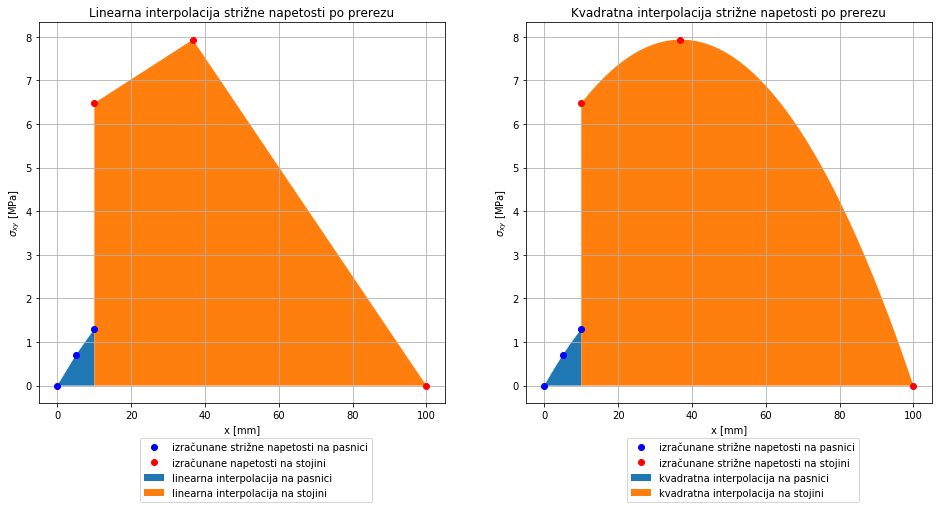

In [23]:
#določimo maksimalno strižno silo (čeprav vemo, da je v prvem polju, preverimo obe polji)
T_max_1 = np.max(strižna_sila_1_graf(x_num1)) #maksimalna strižna sila v prvem polju
T_max_2 = np.max(np.abs(strižna_sila_2_graf(x_num2))) #maksimalna strižna sila v drugem polju
T_max = np.max([T_max_1, T_max_2])

#debeline prereza
d = 10 #mm
t_1 = 100 #mm
t_2 = 20 #mm
h = 100 #mm

#definiramo oddaljenost točke 1 od težišča
e_y = 36.7 #mm

#določimo statične momente prereza
S_ey1 = 0 #mm^3
S_ey2 = (e_y - d/4)*(d/2)*t_1 #mm^3
S_ey3 = (e_y - d/2)*d*t_1 #mm^3
seznam_Sey_1 = [S_ey1, S_ey2, S_ey3] #za uporabo v for zanki
S_ey4 = S_ey3 #mm^3 
S_ey5 = S_ey4 + ((e_y-d)/2)*((e_y-d)*t_2) #mm^3
S_ey6 = 0 #mm^3
seznam_Sey_2 = [S_ey4, S_ey5, S_ey6] #za uporabo v for zanki

#definiramo funkcijo za izračun strižne napetosti
def strižna_nap(S_ey, T_max, I_z, t):
    """
    funkcija, ki vrne vrednost strižne napetosti v podani točki
    
    parameter S_ey: statični moment prereza v podani točki
    parameter T_max: maskimalna strižna sila
    parameter I_z: vztrajnostni moment prereza
    parameter t: debelina prereza v podani točki
    """
    return ((T_max*S_ey)/(t*I_z))

#izvedemo for zanko v takoimenovanem izpeljevanju seznamov
strižne_1 = [strižna_nap(S_ey = i, T_max = T_max, I_z = I_z, t = t_1) for i in seznam_Sey_1]
strižne_2 = [strižna_nap(S_ey = i, T_max = T_max, I_z = I_z, t = t_2) for i in seznam_Sey_2]

#definiramo tabelo točk prve interpolacijske krivulje
x_odtocke1_1 = np.array([0, d/2, d])
tau_prvo = np.array(strižne_1)
x_g1 = np.linspace(x_odtocke1_1[0], x_odtocke1_1[-1], 30*len(x_odtocke1_1))

#definiramo tabelo točk druge interpolacijske krivulje
x_odtocke1_2 = np.array([d+0.01, e_y, h])
tau_drugo = np.array(strižne_2)
x_g2 = np.linspace(x_odtocke1_2[0], x_odtocke1_2[-1], 30*len(x_odtocke1_2))

#uvozimo interpolacijsko funkcijo modula scipy
from scipy.interpolate import interp1d

#naredimo interpolacijske krivulje
g1 = interp1d(x_odtocke1_1, tau_prvo, kind='linear')
g2 = interp1d(x_odtocke1_1, tau_prvo, kind='quadratic')
g3 = interp1d(x_odtocke1_2, tau_drugo, kind='linear')
g4 = interp1d(x_odtocke1_2, tau_drugo, kind='quadratic')

#izrišemo krivulje

#spremenimo velikost grafov
plt.figure(figsize=(16,7))

#graf linearne interpolacije
#definiramo lokacijo grafa
plt.subplot(1, 2, 1)
#skonstruiramo graf
plt.plot(x_odtocke1_1, tau_prvo, 'bo', label='izračunane strižne napetosti na pasnici')
plt.fill_between(x_g1, g1(x_g1), label='linearna interpolacija na pasnici')
plt.plot(x_odtocke1_2, tau_drugo, 'ro', label='izračunane napetosti na stojini')
plt.fill_between(x_g2, g3(x_g2), label = 'linearna interpolacija na stojini')
#poimenujemo graf
plt.title('Linearna interpolacija strižne napetosti po prerezu')
#poimenujemo x os
plt.xlabel('x [mm]')
#poimenujemo y os
plt.ylabel('$\sigma_{xy}$ [MPa]')
#dodamo vidno mrežo
plt.grid()
#dodamo legendo
plt.legend(loc=(0.25,-0.26))

#graf kvadratne interpolacije
#definiramo lokazija grafa
plt.subplot(1, 2, 2)
#skonstruiramo graf
plt.plot(x_odtocke1_1, tau_prvo, 'bo', label='izračunane strižne napetosti na pasnici')
plt.fill_between(x_g1, g2(x_g1), label='kvadratna interpolacija na pasnici')
plt.plot(x_odtocke1_2, tau_drugo, 'ro', label='izračunane strižne napetosti na stojini')
plt.fill_between(x_g2, g4(x_g2), label='kvadratna interpolacija na stojini')
#poimenujemo graf
plt.title('Kvadratna interpolacija strižne napetosti po prerezu')
#poimenujemo x os
plt.xlabel('x [mm]')
#poimenujemo y os
plt.ylabel('$\sigma_{xy}$ [MPa]')
#dodamo vidno mrežo
plt.grid()
#dodamo legendo
plt.legend(loc=(0.25, -0.26))

#izrišemo oba grafa
plt.show()

* * *
# Numerično integriranje

## Definicija naloge
Z numeričnim integriranjem izračunajte površino prereza ter volumen celotnega nosilca. Izračunajte tudi integrale funkcij v prejšnih nalogah izrisanih NTM diagramov in interpolacijskih krivulj razporeda strižnih napetosti po prerezu. 

<img width=900px src="Slika_integriranje.png" alt="Slika 5">
<center>Slika 5</center>

Za izračun površine in volumna nosilca bom uporabljal na zgornji sliki (Slika 5) definiran koordinatni sistem.

Za izračun integrala funkcij NTM diagramov bom uporabil že zgoraj  definirane, simbolno zapisane (s pomočjo sympy-eve lambdify funkcije pretvorjene v funkcije za numerično izvajanje) funkcije NTM diagramov. Za izračun integrala interpolacijskih krivulj pa bom uporabil v prejšni nalogi definirano funkcijo strižne napetosti.

In [24]:
#uvozimo funkcijo quad modula scipy
from scipy.integrate import quad

###Površina prereza in volumen nosilca###

#določimo nedefinirane dimenzije
z_1 = 50 #mm
L = 4000 #mm

#določimo meje integriranja
y_1 = d #mm
y_2 = h #mm

#zapišemo funkcije za integriranje
fz_1 = lambda y_1: h
fz_2 = lambda y_2: z_1 + d
fz_3 = lambda y_2: z_1 - d

#izračunamo integrale definiranih funkcij
A_1 = quad(fz_1, 0, y_1)
A_2 = quad(fz_2, y_1, y_2)
A_3 = quad(fz_3, y_1, y_2)

#izračunamo površino prereza
površina_prereza_int = A_1[0] + A_2[0] - A_3[0]

#za primerjavo izračunamo dejansko površino prereza
površina_prereza_sum = d*h + (h-d)*t_2

#definiramo funkcijo za izračun volumna
V_int = lambda L: površina_prereza_int

#izračunamo integral funkcije za izračun volumna
V_int_r = quad(V_int, 0, L)

#izračunamo volumen nosilca
V_int_rr = V_int_r[0]

#za primerjavo izračunamo dejanski volumen nosilca
volumen_nosilca = L*površina_prereza_sum

#izpišemo rezultate
print(f'Površina prereza in volumen nosilca: \nZ integralom izračunana površina prereza znaša {površina_prereza_int} mm^2. Dejanska površina znaša {površina_prereza_sum} mm^2.')
print(f'Z integralom izračunan volumen nosilca znaša {V_int_rr} mm^3. Dejanski volumen pa znaša {volumen_nosilca} mm^3.\n')    
      
###NTM diagrami###

#zapišemo meje obeh polj
meja_1_a = 0
meja_1_b = x_0r
meja_2_a = x_0r
meja_2_b = 4000

#izračunamo integral osne sile v prvem in drugem polju
int_osna_sila_prvo_polje = quad(osna_sila_1_graf, meja_1_a, meja_1_b)
int_osna_sila_drugo_polje = quad(osna_sila_2_graf, meja_2_a, meja_2_b)

#zapišemo rezultat integrala obeh polji grafa osne sile
int_graf_osne_sile = int_osna_sila_prvo_polje[0] + int_osna_sila_drugo_polje[0]

#izračunamo integral strižne sile v prvem in drugem polju
int_strižna_sila_prvo_polje = quad(strižna_sila_1_graf, meja_1_a, meja_1_b)
int_strižna_sila_drugo_polje = quad(strižna_sila_2_graf, meja_2_a, meja_2_b)

#zapišemo razultat integrala obeh polji grafa strižne sile
int_graf_strižne_sile = int_strižna_sila_prvo_polje[0] + int_strižna_sila_drugo_polje[0]

#izračunamo integral momenta v prvem in drugem polju
int_moment_prvo_polje = quad(moment_1_graf, meja_1_a, meja_1_b)
int_moment_drugo_polje = quad(moment_2_graf, meja_2_a, meja_2_b)

#zapišemo rezultat integrala grafa notranjega momenta
int_graf_momenta = int_moment_prvo_polje[0] + int_moment_drugo_polje[0]

#izpišemo rezultate
print(f'Rezultati integriranja NTM diagramov:\nIntegral diagrama notranje osne sile N(x) oz. napake, ki smo jo pri izračunu le te naredili znaša {int_graf_osne_sile:.2e}.\nIntegral diagrama notranje strižne sile T(x) znaša {int_graf_strižne_sile:.10f}.\nIntegral diagrama notranjega momenta M(x) znaša {int_graf_momenta:.2f}.\n') 

###interpolacijske krivulje razporeda strižnih napetosti po prerezu###

#izračunamo integral linearne interpolacije v prvem polju
int_g1 = quad(g1, 0, d)

#izračunamo integral linearne interpolacije v drugem polju
int_g3 = quad(g3, d, h)

#zapišemo integral linearne interpolacijske krivulje
int_linearna_interpolacija = int_g1[0] + int_g3[0]

#izračunamo integral kvadratne interpolacije v prvem polju
int_g2 = quad(g2, 0, d)

#izračunamo integral kvadratne interpolacije v drugem polju
int_g4 = quad(g4, d, h)

#zapišemo integral kvadratne interpolacije
int_kvadratna_interpolacija = int_g2[0] + int_g4[0]

#izpišemo rezultate
print(f'Rezultati integriranja interpolacijskih krivulj:\nVrednost integrala linearnih interpolacijskih krivulj je {int_linearna_interpolacija:.2f}.\nVrednost integrala kvadratnih interpolacijskih krivulj je {int_kvadratna_interpolacija:.2f}.')

Površina prereza in volumen nosilca: 
Z integralom izračunana površina prereza znaša 2800.000000000001 mm^2. Dejanska površina znaša 2800 mm^2.
Z integralom izračunan volumen nosilca znaša 11200000.000000004 mm^3. Dejanski volumen pa znaša 11200000 mm^3.

Rezultati integriranja NTM diagramov:
Integral diagrama notranje osne sile N(x) oz. napake, ki smo jo pri izračunu le te naredili znaša -7.28e-09.
Integral diagrama notranje strižne sile T(x) znaša -0.0000000130.
Integral diagrama notranjega momenta M(x) znaša 20536152630.94.

Rezultati integriranja interpolacijskih krivulj:
Vrednost integrala linearnih interpolacijskih krivulj je 450.23.
Vrednost integrala kvadratnih interpolacijskih krivulj je 541.17.


***
# Reševanje diferencialnih enačb

## Definicija naloge
Na nosilec zapade velika količina snega, zato se ta v podporah poruši in pada 15 sekund, ter nato pristane na tleh. Predpostavimo, da ne pride do rotacije nosilca in pada po principu prostega pada. Z reševanjem diferencialne enačbe izriši graf hitrosti v odvisnosti od časa in graf premika v odvisnosti od časa. 

<img width=500px src="Slika_diferencialne.png" alt="Slika 6">
<center>Slika 6</center>

Ko nastavimo sistem prikazan na zgornji sliki (Slika 6), dobimo enačbo (2. Newtonov zakon):

$$m*a = F_g - F_c$$

$$m*a = m*g - K*v^2$$

Pri čemer K predstavlja preostale koeficiente v sili zračnega upora:

$$F_c = \frac{1}{2}*c*S*A*v^2$$

Upoštevamo da je hitrost (v) prvi odvod premika (x) po času, pospešek (a) pa je drugi odvod premika po času, tako lahko zapišemo naslednjo diferencialno enačbo:

$$x''(t) = g - \frac{K*(x'(t))^2}{m}$$

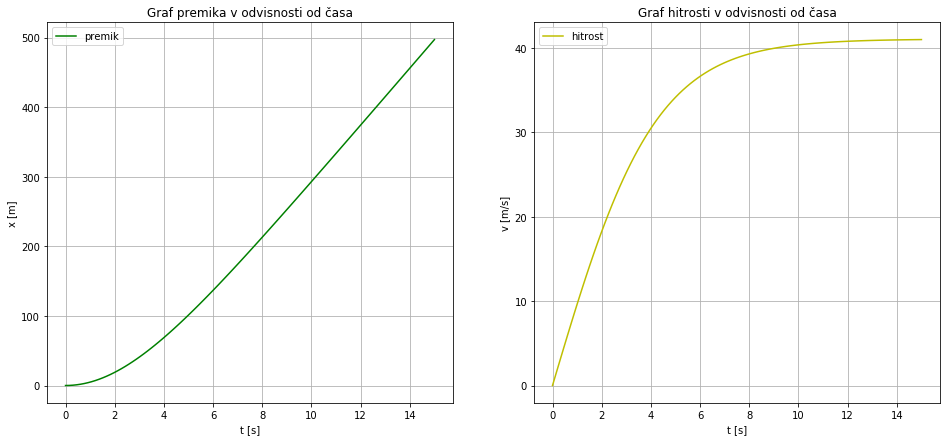

In [27]:
#uvozimo funkcijo odeint modula scipy
from scipy.integrate import odeint

#definiramo podatke
volumen = volumen_nosilca*10**-9 #iz mm^3 v m^3
gostota = 7900 #kg/m**3
m = volumen*gostota #kg
c = 1.05 #koeficient zračnega upora za štirioglata telesa
S = 1.225 #kg/m^3 - gostota zraka
A = 0.4 #m^2 - površina nosilca pri predpostavki, da se nosilec ne vrti
g = 9.81 #m/s**2
K = c*S*A #kg/m

#definiramo začetni pogoj
zac_pogoj = [0, 0] 

#definiramo numerično polje časa
čas = np.linspace(0, 15, 100)

#definiramo funkcijo
def dif_odeint(x, t, m, K, g):
    """
    diferencialno enačbo drugega reda preoblikujemo v sistem diferencialnih enačb prvega reda
    
    """
    ddt = g - (K/m)*x[1]**2
    return x[1], ddt

#rešimo diferencialno enačbo
rešitev_dif = odeint(dif_odeint, zac_pogoj, čas, args=(m, K, g))

#določimo premik x(t)
premik = rešitev_dif[:, 0] #prvi stolpec

#določimo hitrost x'(t)
hitrost = rešitev_dif[:, 1] #drugi stolpec

#izrišemo rešitev

#spremenimo velikost grafov
plt.figure(figsize=(16,7))

#definiramo lokacijo grafa
plt.subplot(1, 2, 1)
#skonstruiramo graf premika
plt.plot(čas, premik, 'g', label='premik')
#poimenujemo graf
plt.title('Graf premika v odvisnosti od časa')
#poimenujemo x os
plt.xlabel('t [s]')
#poimenujemo y os
plt.ylabel('x [m]')
#dodamo vidno mrežo
plt.grid()
#dodamo legendo
plt.legend()

#definiramo lokacijo grafa
plt.subplot(1, 2, 2)
#skonstruiramo graf hitrosti
plt.plot(čas, hitrost, 'y', label='hitrost')
#poimenujemo graf
plt.title('Graf hitrosti v odvisnosti od časa')
#poimenujemo x os
plt.xlabel('t [s]')
#poimenujemo y os
plt.ylabel('v [m/s]')
#dodamo vidno mrežo
plt.grid()
#dodamo legendo
plt.legend()

#izrišemo grafa
plt.show()